The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [51]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [52]:
#loading dataset
data = pd.read_csv('wine_quality.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
# CHECKING COLUMNS
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [54]:
# description of dataset 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
# checking data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
#checking for null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
# checking if there are any duplicates
data.drop_duplicates(inplace= True)
data.shape

(1359, 12)

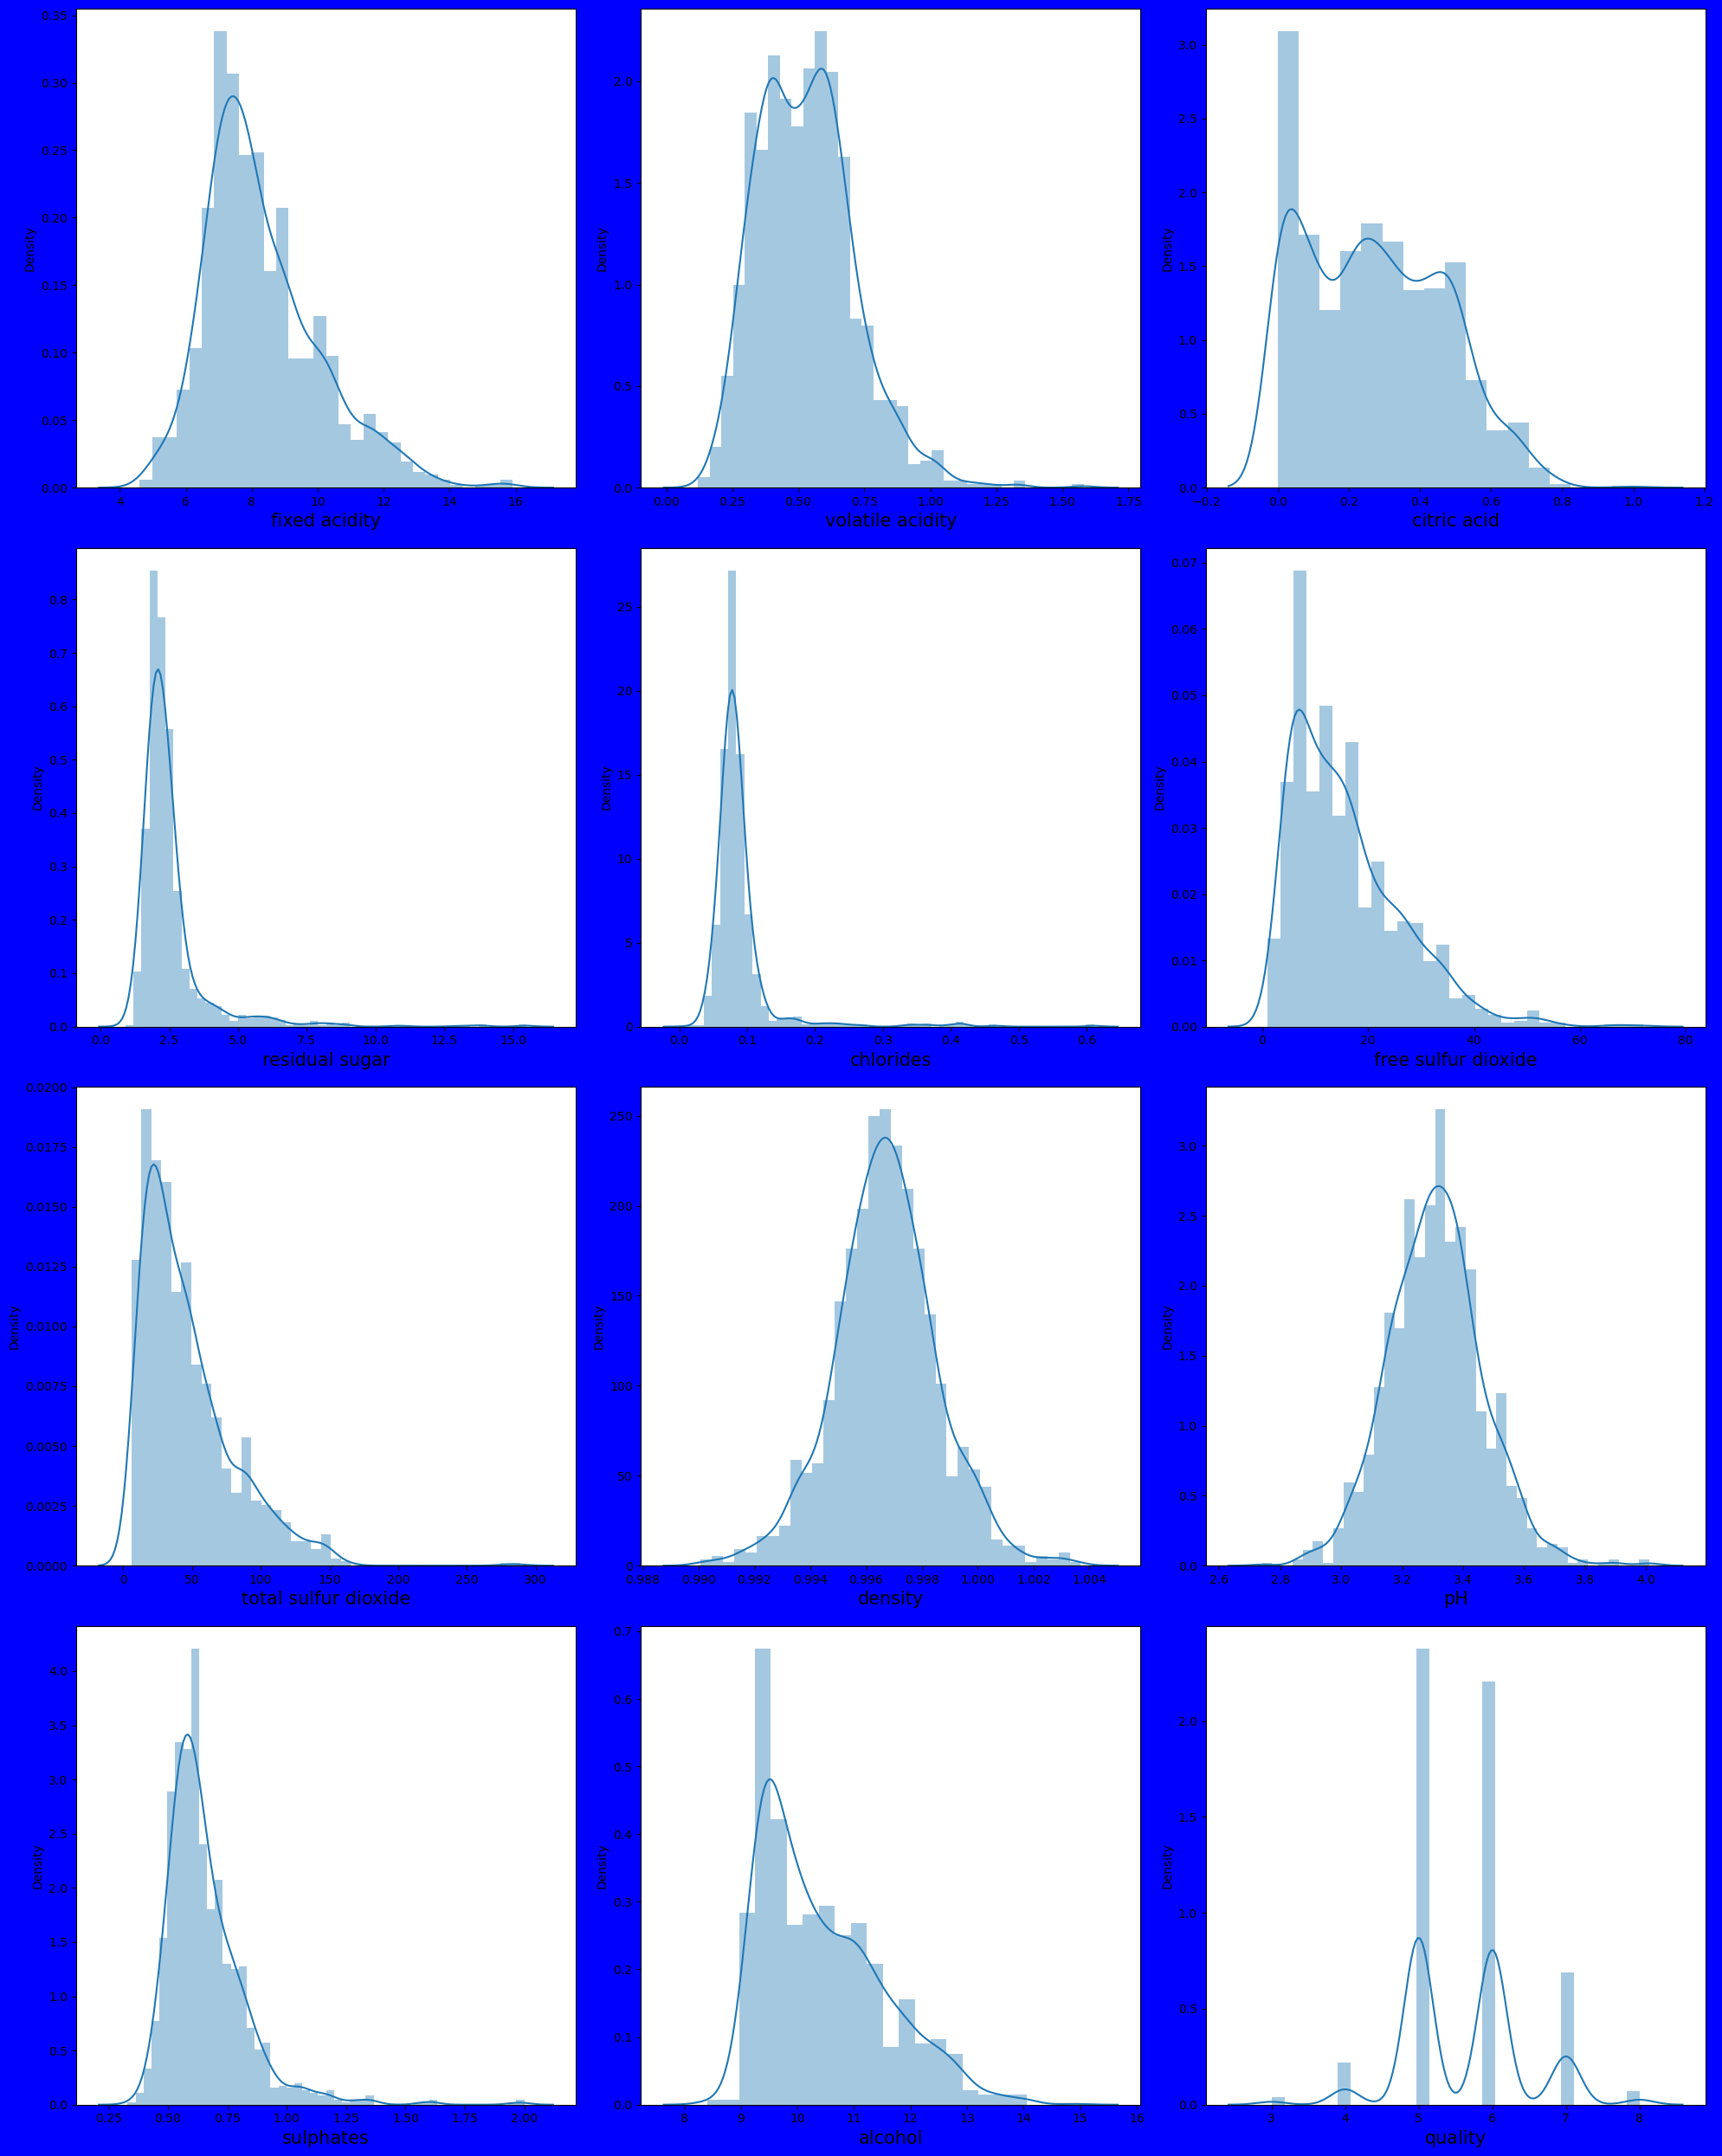

In [27]:
# visualization of data
# checking how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### By looking at this graph we can see that skewness is present and outlier is also present 

In [58]:
features = data.drop(['quality'],axis=1)

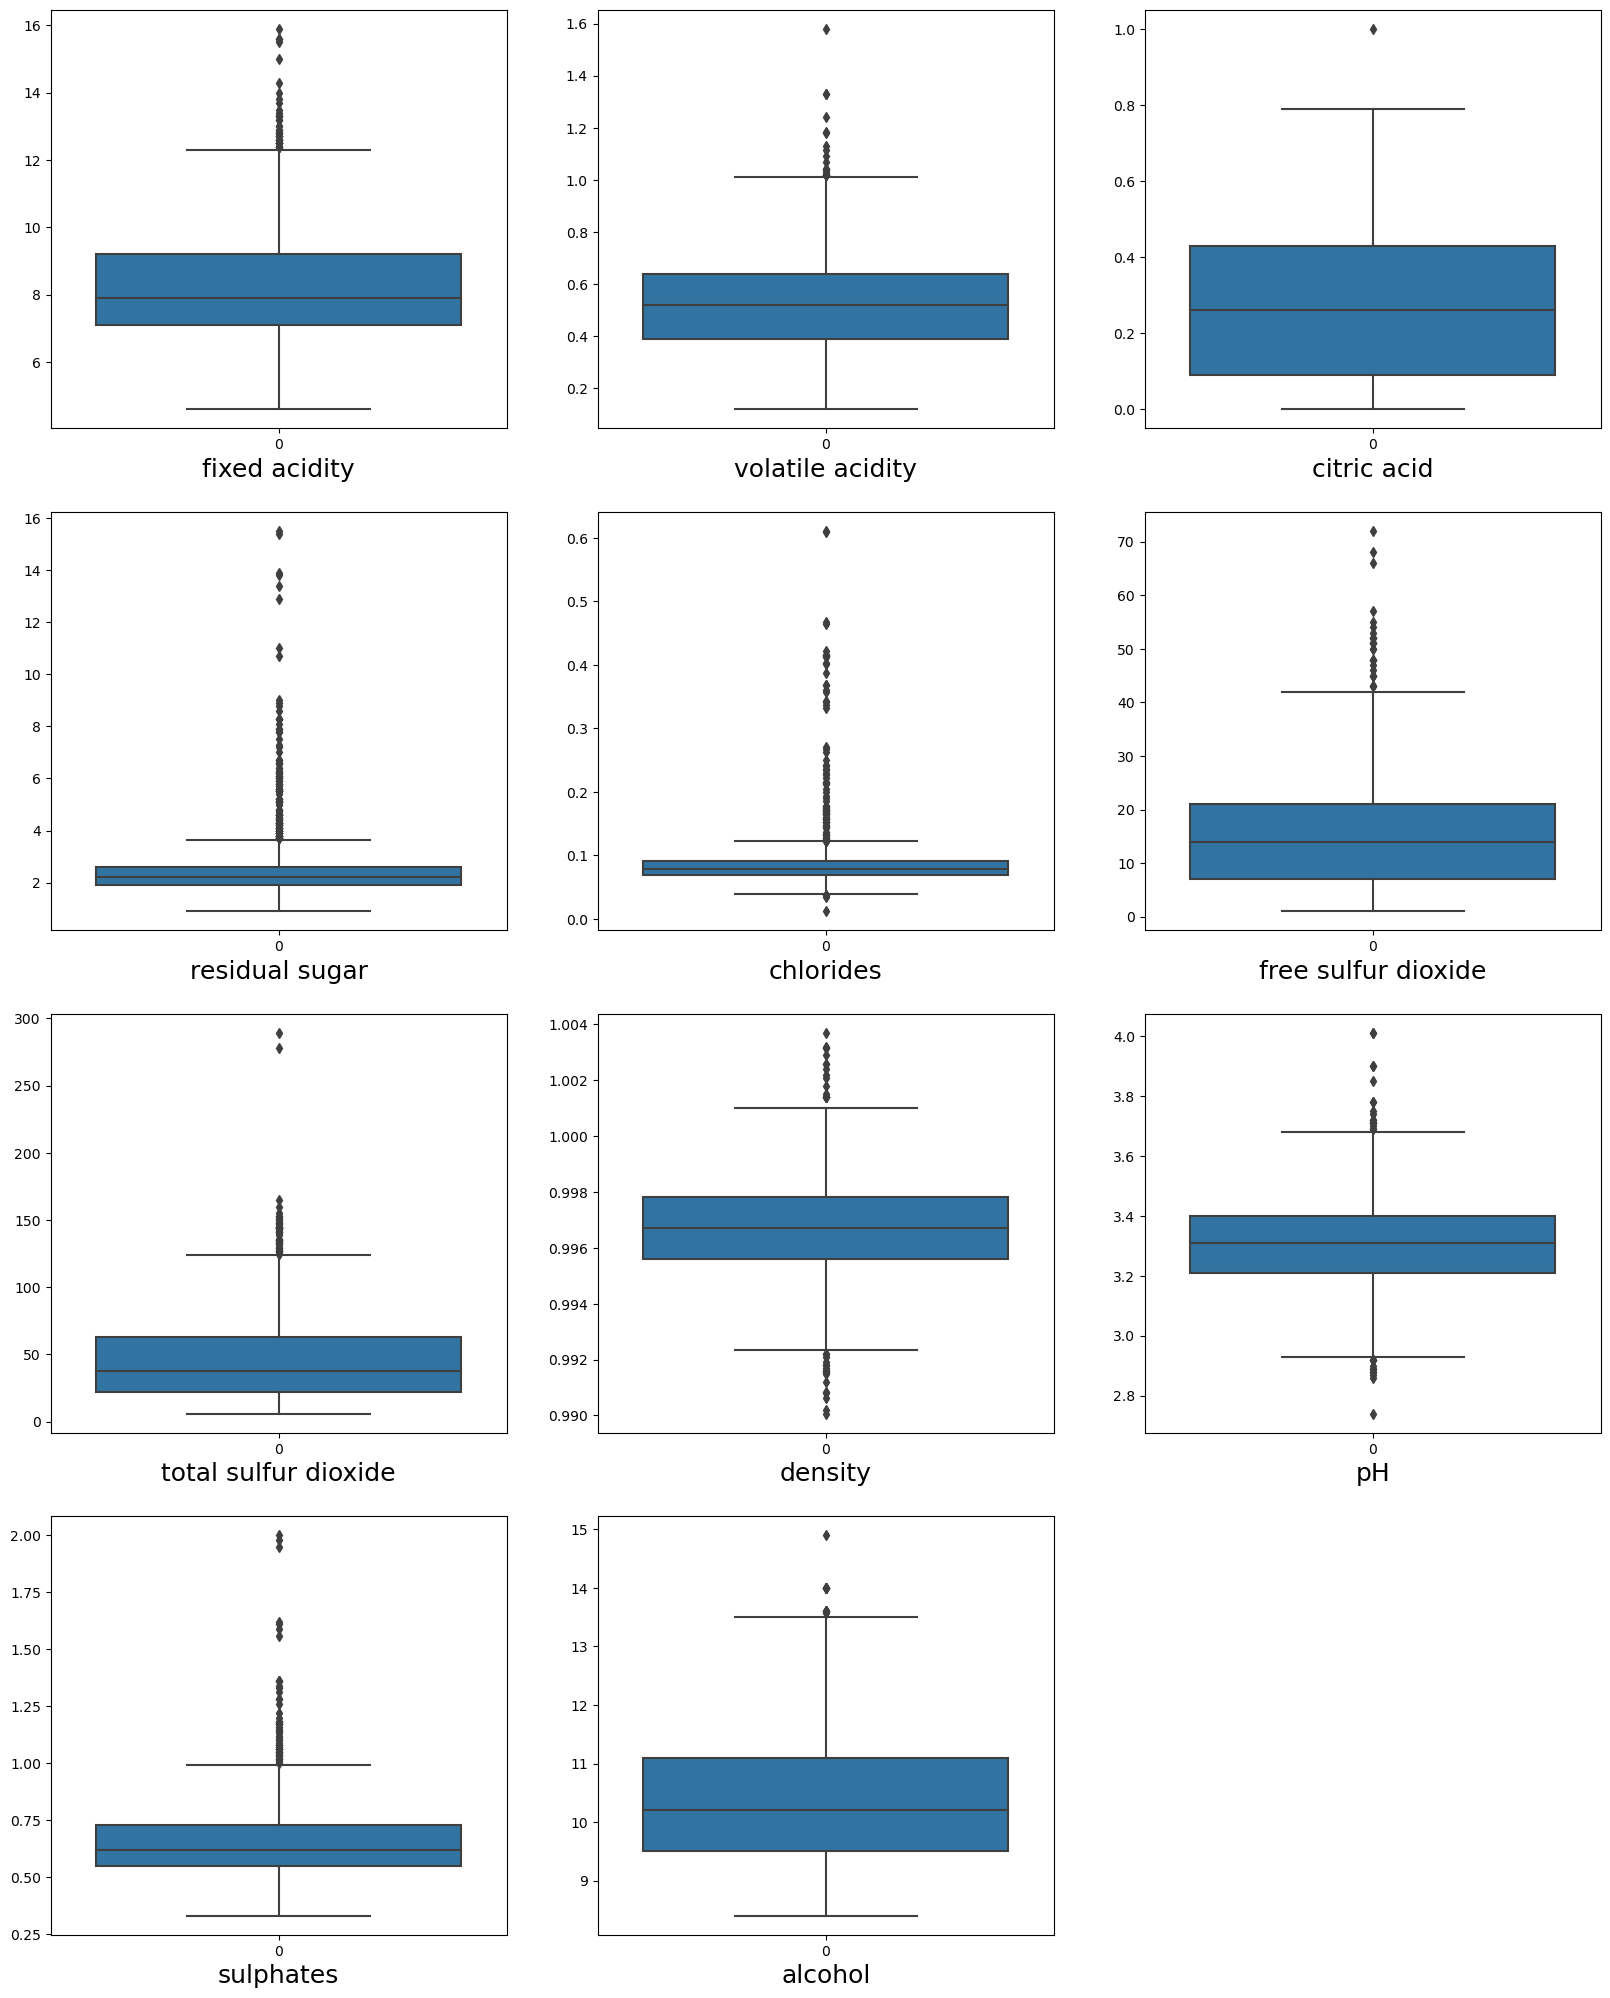

In [59]:
# plotting box plot to visualize the outliers

plt.figure(figsize=(20,25))
graph= 1 
for column in features:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data=features[column])
        plt.xlabel(column,fontsize=18)
    graph+=1
plt.show()

#### As we can see in the data above there are outliers present so we will bee using zscore method to remove the outliers

In [60]:
# importing zscore libraries
from scipy.stats import zscore 

In [61]:
z=np.abs(zscore(data))

In [62]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374,0.757040
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575,0.757040
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575,0.757040
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575,0.457621
5,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374,0.757040
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924,0.457621
1594,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574,0.757040
1595,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723,0.457621
1597,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775,0.757040


In [63]:
threshold=3
print(np.where(z>3))
z

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
         41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
         99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
        150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
        252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
        363,  385,  385,  393,  400,  408,  420,  420,  433,  448,  450,
        473,  483,  483,  485,  485,  492,  506,  510,  513,  516,  528,
        534,  555,  562,  562,  564,  565,  565,  565,  582,  582,  592,
        597,  597,  599,  602,  626,  627,  632,  652,  671,  672,  687,
        710,  718,  722,  764,  764,  771,  781,  786,  791,  792,  838,
        866,  888,  895,  895,  912,  918,  918,  920,  920,  945,  948,
        963,  985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073,
       1081, 1081, 1082, 1082, 1103, 1106, 1106, 1107, 1117, 1121, 1123,
       1123, 1125, 1151, 1159, 1162, 1165, 1165, 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.524431,0.932000,1.393258,0.461157,0.245623,0.468554,0.384050,0.584003,1.291872,0.578561,0.954374,0.757040
1,0.294063,1.915800,1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,0.708395,0.124822,0.584575,0.757040
2,0.294063,1.259934,1.188617,0.165259,0.078535,0.085537,0.214813,0.155790,0.321247,0.051024,0.584575,0.757040
3,1.664067,1.363534,1.471711,0.461157,0.265883,0.105971,0.394471,0.691057,0.966495,0.461331,0.584575,0.457621
5,0.524431,0.713378,1.393258,0.535132,0.265883,0.277045,0.204391,0.584003,1.291872,0.578561,0.954374,0.757040
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.869983,0.494756,0.983977,0.461157,0.407702,1.159265,0.264277,0.106490,0.711149,0.945435,0.861924,0.457621
1594,1.215536,0.385444,0.983977,0.387183,0.038015,1.542281,0.084619,0.968269,0.904724,0.461331,0.062574,0.757040
1595,1.388312,0.112167,0.881656,0.239233,0.529261,2.212559,0.124983,0.850510,1.356397,0.593744,0.709723,0.457621
1597,1.388312,0.631395,0.779336,0.387183,0.265883,1.542281,0.084619,0.663167,1.679021,0.300667,0.214775,0.757040


In [64]:
# removing outliers

new_data=data[(z<3).all(axis=1)]

In [65]:
print(data.shape)
print(new_data.shape)

(1359, 12)
(1232, 12)


In [66]:
# checking the loss of data

percentloss=(1359-1232)/1359*100
print(percentloss)

9.345106696100073


In [67]:
# checking heatmap
corr=new_data.corr()

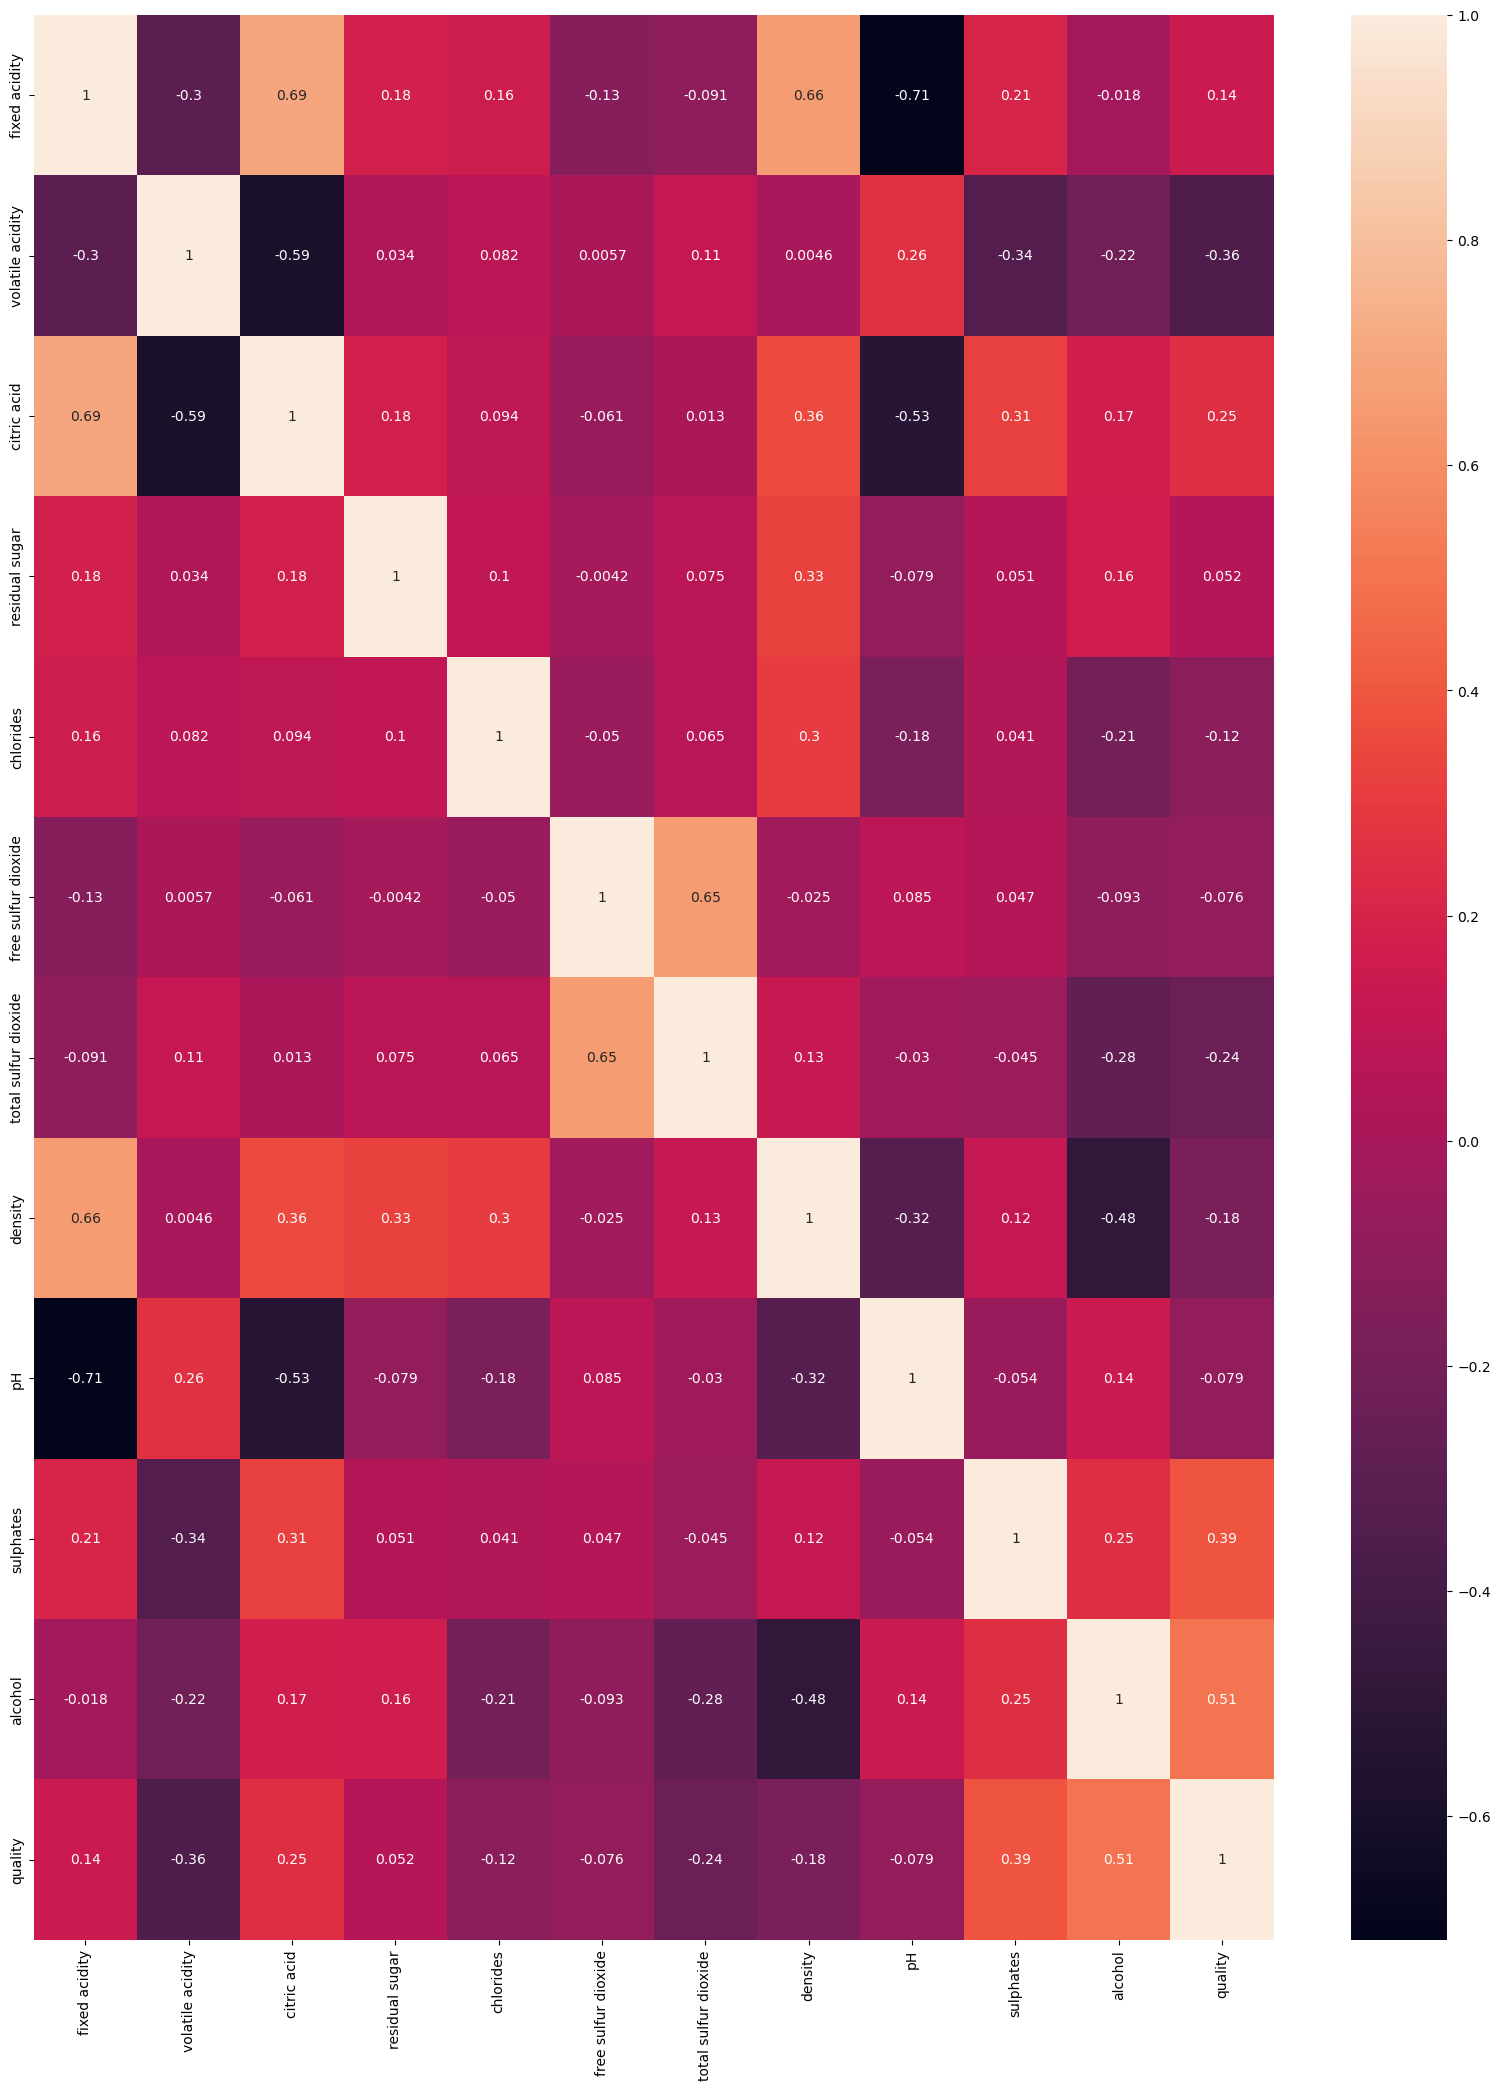

In [68]:
plt.figure(figsize=(20,25))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [69]:
# dividing the data sets into dependent and independent features
x=new_data.drop(['quality'],axis=1)
y=new_data['quality']

In [70]:
#Using Feature Selection Method
#Importing important libraries
from sklearn.feature_selection import SelectPercentile,chi2

In [71]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)
spercentile=spercentile.fit(x,y)
cols=spercentile.get_support(indices=True)
print('Feature Index:',cols)
features=x.columns[cols]
print('Features:',features)
df=pd.DataFrame({
    'features':x.columns,
    'chi2score':spercentile.scores_,
    'pvalue':spercentile.pvalues_
})
df.sort_values(by='chi2score',ascending=False)

Feature Index: [ 0  1  2  3  5  6  9 10]
Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')


,features,chi2score,pvalue
6,total sulfur dioxide,2455.294345,0.000000e+00
5,free sulfur dioxide,115.818604,4.173434e-24
10,alcohol,36.694879,2.081766e-07
2,citric acid,10.746555,2.956502e-02
1,volatile acidity,9.311512,5.376771e-02
0,fixed acidity,8.544356,7.355408e-02
9,sulphates,4.974237,2.899512e-01
3,residual sugar,4.500241,3.425189e-01
4,chlorides,0.148547,9.973746e-01
8,pH,0.115584,9.983930e-01


#### in the above data we can see that chi2score is less for chlorides, pH and density so we will drop these values

In [72]:
# taking new data set for features
new_x=new_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]

In [73]:
# checking unique value present in label
new_data['quality'].unique()

array([5, 6, 7, 4, 8], dtype=int64)

In [75]:
#Since there are lot of values, so giving a category for the particular values
#values more than or equal to 7 will be considered as Good and will be replaced by value 1
#Values less 7 will be considered as not good and will be replaced by value 0
new_data['quality']=new_data['quality'].replace({5:0,6:0,7:1,4:0,8:1,3:0})
new_data['quality']

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1232, dtype: int64

In [76]:
new_data['quality'].value_counts()

0    1063
1     169
Name: quality, dtype: int64

### data is imbalance

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
#using standardization methid to standardize the data
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)
x_scaler

array([[-0.54798828,  1.0230202 , -1.39643309, ..., -0.34467544,
        -0.63286796, -0.98817892],
       [-0.30533519,  2.07014562, -1.39643309, ...,  0.75387619,
         0.29112176, -0.6028431 ],
       [-0.30533519,  1.372062  , -1.18665312, ...,  0.32111343,
         0.06012433, -0.6028431 ],
       ...,
       [-1.45793738,  0.15041568, -0.87198316, ...,  0.2212451 ,
         0.90711492,  0.7458323 ],
       [-1.45793738,  0.7030652 , -0.76709317, ..., -0.011781  ,
         0.5221192 , -0.21750727],
       [-1.3972741 , -1.24575155,  1.06848161, ..., -0.07835989,
         0.13712348,  0.55316438]])

In [79]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
# initiating decision tree classifier
dt=DecisionTreeClassifier()

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=46)

In [82]:
y_train.value_counts()

5    415
6    351
7    116
4     31
8     11
Name: quality, dtype: int64

In [90]:
#using range fucntion to find the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f'at random state{i},the training accuracy is:-{accuracy_score(y_train,pred)}')
    print(f'at random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}')

at random state0,the training accuracy is:-1.0
at random state0,the testing accuracy is:-0.4967532467532468
at random state1,the training accuracy is:-1.0
at random state1,the testing accuracy is:-0.4577922077922078
at random state2,the training accuracy is:-1.0
at random state2,the testing accuracy is:-0.5162337662337663
at random state3,the training accuracy is:-1.0
at random state3,the testing accuracy is:-0.4935064935064935
at random state4,the training accuracy is:-1.0
at random state4,the testing accuracy is:-0.4675324675324675
at random state5,the training accuracy is:-1.0
at random state5,the testing accuracy is:-0.5194805194805194
at random state6,the training accuracy is:-1.0
at random state6,the testing accuracy is:-0.5551948051948052
at random state7,the training accuracy is:-1.0
at random state7,the testing accuracy is:-0.5324675324675324
at random state8,the training accuracy is:-1.0
at random state8,the testing accuracy is:-0.4577922077922078
at random state9,the trainin

In [91]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=46)

In [92]:
#Training the data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        

In [94]:
#calling the function and passing the dataset
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:46.10%

 Test Classification Report:
               precision    recall  f1-score   support

           4       0.08      0.06      0.07        16
           5       0.48      0.59      0.53       110
           6       0.51      0.46      0.49       140
           7       0.38      0.29      0.33        38
           8       0.00      0.00      0.00         4

    accuracy                           0.46       308
   macro avg       0.29      0.28      0.28       308
weighted avg       0.45      0.46      0.45       308



In [95]:
y_pred=dt.predict(x_test)

In [96]:
#confusion Matrix
score=confusion_matrix(y_test,y_pred)
score

array([[ 1,  8,  6,  1,  0],
       [ 5, 65, 37,  3,  0],
       [ 7, 53, 65, 13,  2],
       [ 0,  8, 19, 11,  0],
       [ 0,  2,  1,  1,  0]], dtype=int64)

In [97]:
#Importing Libraries
from sklearn.model_selection import cross_val_score

In [99]:
rfc=RandomForestClassifier()

In [101]:
#finding cross validation score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {y_test}')
    print('\n')

at cross fold 2 the cv score is0.5625and accuracy for the testing is 1157    7
1454    6
670     5
71      5
1147    7
       ..
411     5
698     5
756     6
945     7
422     5
Name: quality, Length: 308, dtype: int64


at cross fold 3 the cv score is0.5690067849583605and accuracy for the testing is 1157    7
1454    6
670     5
71      5
1147    7
       ..
411     5
698     5
756     6
945     7
422     5
Name: quality, Length: 308, dtype: int64


at cross fold 4 the cv score is0.5689935064935066and accuracy for the testing is 1157    7
1454    6
670     5
71      5
1147    7
       ..
411     5
698     5
756     6
945     7
422     5
Name: quality, Length: 308, dtype: int64


at cross fold 5 the cv score is0.5641749777821665and accuracy for the testing is 1157    7
1454    6
670     5
71      5
1147    7
       ..
411     5
698     5
756     6
945     7
422     5
Name: quality, Length: 308, dtype: int64


at cross fold 6 the cv score is0.551172152498224and accuracy for the testing

In [102]:
#Using Grid Search cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid=({
    'criterion':['gini','entropy'],
    'max_depth':[5,7,9,11,13],
    'min_samples_split':[1,3,5,7,8,9],
    'min_samples_leaf':[2,3,4,5,6,7],
    'max_leaf_nodes':[4,5,6,7,8,9]
})

In [104]:
grid_search=GridSearchCV(dt,param_grid=param_grid,n_jobs=-1)

In [105]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 3, 5, 7, 8, 9]})

In [107]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [108]:
#Training with the best parameters
dt=DecisionTreeClassifier(criterion='entropy',max_depth=13,max_leaf_nodes=7,min_samples_leaf=2,min_samples_split=3)
dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

In [109]:
#calling the function and passing the dataset
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#Testing S


=====Train Score=====
Accuracy Score:58.01%

=====Test Score=====
Accuracy Score:55.19%

 Test Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.61      0.73      0.66       110
           6       0.54      0.61      0.57       140
           7       0.28      0.13      0.18        38
           8       0.00      0.00      0.00         4

    accuracy                           0.55       308
   macro avg       0.28      0.29      0.28       308
weighted avg       0.50      0.55      0.52       308

